## 3.1

In [ ]:
from func import load_data

dataset, index = load_data("../test_data/resin.csv", index="")
print(dataset)

shape: (20, 6)
┌──────────┬────────────────┬────────────────┬────────────────┬─────────────┬──────┐
│ property ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time │
│ ---      ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---  │
│ f64      ┆ f64            ┆ f64            ┆ f64            ┆ i64         ┆ i64  │
╞══════════╪════════════════╪════════════════╪════════════════╪═════════════╪══════╡
│ 0.125    ┆ 0.5            ┆ 0.1            ┆ 0.4            ┆ 85          ┆ 80   │
│ 0.122    ┆ 0.7            ┆ 0.0            ┆ 0.3            ┆ 55          ┆ 50   │
│ 0.624    ┆ 0.0            ┆ 0.2            ┆ 0.8            ┆ 70          ┆ 40   │
│ 0.042    ┆ 0.9            ┆ 0.1            ┆ 0.0            ┆ 60          ┆ 90   │
│ 0.589    ┆ 0.2            ┆ 0.0            ┆ 0.8            ┆ 75          ┆ 120  │
│ …        ┆ …              ┆ …              ┆ …              ┆ …           ┆ …    │
│ 0.087    ┆ 0.5            ┆ 0.3            ┆ 0.2

## 3.2 ヒストグラム

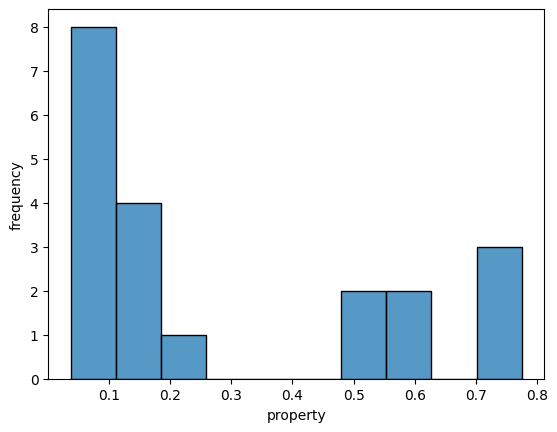

In [ ]:
# 3.2 ヒストグラム
import seaborn as sns
from func import load_data
from matplotlib import pyplot as plt

dataset, index = load_data("../test_data/resin.csv", index="")

x_name = "property"  # ヒストグラムを作成する変数名
y_name = "frequency"  # 縦軸の変数名
number_of_bins = 10
# ヒストグラムの作成
axes = sns.histplot(data=dataset, x=x_name, bins=number_of_bins)
axes.set_xlabel(x_name)  # 横軸の名前
axes.set_ylabel(y_name)  # 縦軸の名前
plt.savefig("../output/03_02/histogram.png")  # 画像の保存

## 3.2 散布図

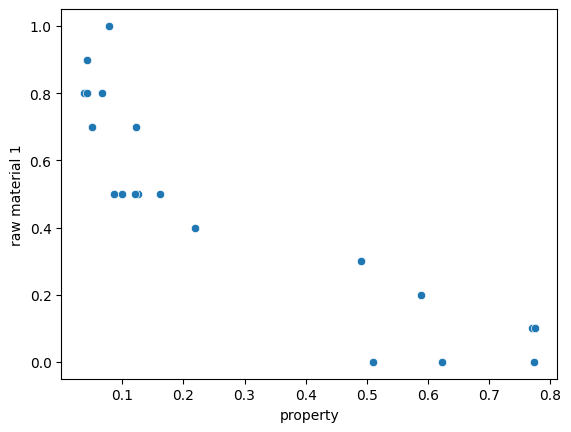

In [ ]:
# 3.2 散布図

import seaborn as sns
from func import load_data

dataset, index = load_data("../test_data/resin.csv", index="")

x_name = "property"  # 縦軸の変数名
y_name = "raw material 1"  # 横軸の変数名

axes = sns.scatterplot(dataset, x=x_name, y=y_name)  # 散布図の作成
axes.set_xlabel(x_name)
axes.set_ylabel(y_name)
plt.savefig("../output/03_02/scatter_plot.png")  # 画像の保存

## 3.3 統計量の確認

In [ ]:
# 3.3 統計量の確認

from func import load_data

dataset, index = load_data("../test_data/resin.csv", index="")
stat_data = dataset.describe()
stat_data.write_csv("../output/03_03/resin_statistics.csv", quote_style="never")
stat_data

statistic,property,raw material 1,raw material 2,raw material 3,temperature,time
str,f64,f64,f64,f64,f64,f64
"""count""",20.0,20.0,20.0,20.0,20.0,20.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.28925,0.465,0.12,0.415,72.25,55.5
"""std""",0.282036,0.319992,0.115166,0.328113,16.260624,35.015034
"""min""",0.037,0.0,0.0,0.0,50.0,10.0
"""25%""",0.079,0.2,0.0,0.1,60.0,40.0
"""50%""",0.125,0.5,0.1,0.3,70.0,50.0
"""75%""",0.511,0.7,0.2,0.7,85.0,80.0
"""max""",0.775,1.0,0.4,0.9,100.0,120.0


In [ ]:
import polars as pl
from func import load_data

dataset, index = load_data("../test_data/resin.csv", index="")

cov_data = dataset.select(
    [
        pl.concat([pl.cov(col1, col2) for col2 in dataset.columns])
        for col1 in dataset.columns
    ]
).insert_column(0, pl.Series("", dataset.columns))
cov_data.write_csv("../output/03_03/resin_covariance.csv", quote_style="never")
print(cov_data)

corr_data = dataset.corr().insert_column(0, pl.Series("", dataset.columns))
corr_data.write_csv(
    "../output/03_03/resin_correlation_coefficient.csv", quote_style="never"
)
print(corr_data)

shape: (6, 7)
┌──────────────┬───────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┐
│              ┆ property  ┆ raw material ┆ raw material ┆ raw         ┆ temperature ┆ time        │
│ ---          ┆ ---       ┆ 1            ┆ 2            ┆ material 3  ┆ ---         ┆ ---         │
│ str          ┆ f64       ┆ ---          ┆ ---          ┆ ---         ┆ f64         ┆ f64         │
│              ┆           ┆ f64          ┆ f64          ┆ f64         ┆             ┆             │
╞══════════════╪═══════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╡
│ property     ┆ 0.079544  ┆ -0.080622    ┆ -0.007684    ┆ 0.088307    ┆ 0.242303    ┆ -2.279868   │
│ raw material ┆ -0.080622 ┆ 0.102395     ┆ -0.004       ┆ -0.098395   ┆ -0.496053   ┆ 2.518421    │
│ 1            ┆           ┆              ┆              ┆             ┆             ┆             │
│ raw material ┆ -0.007684 ┆ -0.004       ┆ 0.013263     ┆ -0.009263   ┆ 0.05

## 3.4 特徴量の標準化

In [ ]:
# 3.4 特徴量の標準化

import polars as pl
from func import autoscaling, delete_zero_std_columns, load_data

dataset, index = load_data("../test_data/resin.csv", index="")

dataset_wo_zero_std = delete_zero_std_columns(dataset)

# 特徴量の標準化
autoscaled_dataset = autoscaling(dataset_wo_zero_std)

print("標準化後の平均値")
print(autoscaled_dataset.mean())
print("\n標準化後の標準偏差")
print(autoscaled_dataset.std())

autoscaled_dataset.clone().insert_column(0, index).write_csv(
    "../output/03_04/autoscaled_dataset.csv", quote_style="never"
)


標準化後の平均値
shape: (1, 6)
┌────────────┬────────────────┬────────────────┬────────────────┬─────────────┬─────────────┐
│ property   ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time        │
│ ---        ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---         │
│ f64        ┆ f64            ┆ f64            ┆ f64            ┆ f64         ┆ f64         │
╞════════════╪════════════════╪════════════════╪════════════════╪═════════════╪═════════════╡
│ 1.7764e-16 ┆ -6.6613e-17    ┆ 7.7716e-17     ┆ 2.0539e-16     ┆ 2.2204e-17  ┆ -1.1102e-17 │
└────────────┴────────────────┴────────────────┴────────────────┴─────────────┴─────────────┘

標準化後の標準偏差
shape: (1, 6)
┌──────────┬────────────────┬────────────────┬────────────────┬─────────────┬──────┐
│ property ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time │
│ ---      ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---  │
│ f64      ┆ f64            ┆ f64      

## 3.5 最小二乗法による回帰分析

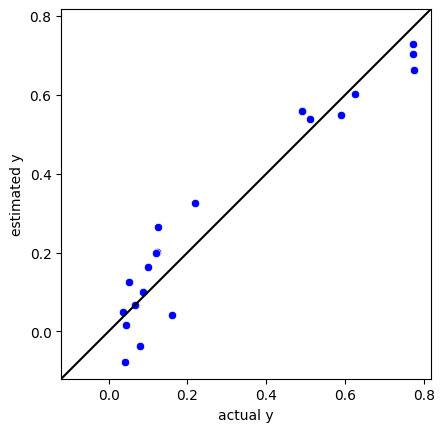

In [ ]:
# 3.5 最小二乗法による回帰分析

import polars as pl
import seaborn as sns
from func import (
    autoscaling,
    delete_zero_std_columns,
    load_data,
    rescaling,
    scatter_plot_of_result,
)
from sklearn.linear_model import LinearRegression  # OLS モデルの構築に使用

dataset, index = load_data("../test_data/resin.csv", index="")
# モデル構築 1. データセットの分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# モデル構築 2. 特徴量の標準化 (標準偏差が 0 の特徴量の削除)
x_wo_zero_std = delete_zero_std_columns(x)
autoscaled_x = autoscaling(x_wo_zero_std)
autoscaled_y = autoscaling(y)

# モデル構築 3. OLS による標準回帰係数の計算
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデルの構築

# 標準回帰係数を保存
pl.DataFrame(
    {"": x.columns, "standard_regression_coefficients": model.coef_}
).write_csv(
    "../output/03_05/standard_regression_coefficients_ols.csv", quote_style="never"
)

# 今回はモデル構築に用いたデータセットと同じデータセットにおける Y の値を推定します
# 新しいデータの推定 1. モデル構築用のデータセットを用いた特徴量の標準化
autoscaled_x_new = autoscaling(x, x_wo_zero_std)

# 新しいデータの推定 2. Y の値の推定
autoscaled_estimated_y_new = pl.Series("estimated_y", model.predict(autoscaled_x_new))

# 新しいデータの推定 3. 推定値のスケールをもとに戻す
estimated_y_new = rescaling(autoscaled_estimated_y_new, y)
pl.DataFrame({"": index, "estimated_y": estimated_y_new}).write_csv(
    "../output/03_05/estimated_y_ols.csv", quote_style="never"
)

scatter_plot_of_result(
    "../output/03_05/actual_vs_estimated_ols.png",
    y,
    estimated_y_new,
    x_label="actual y",
    y_label="estimated y",
)


## 3.6 外部バリデーション

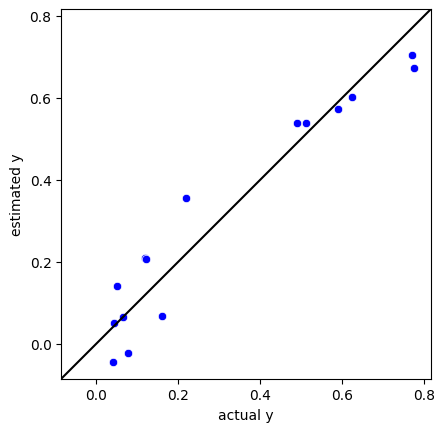

r^2 for training data : 0.920574061363659
RMSE for training data : 0.07642250753813627
MAE for training data : 0.06501558909890057


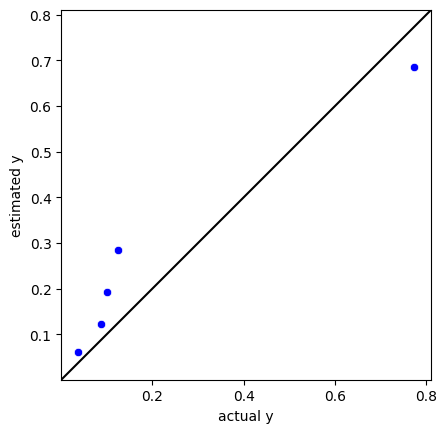

r^2 for training data : 0.8858269877135411
RMSE for training data : 0.09318984065049911
MAE for training data : 0.07967076922528646


In [ ]:
# 3.6 外部バリデーション
import polars as pl
from func import (
    autoscaling,
    delete_zero_std_columns,
    load_data,
    rescaling,
    scatter_plot_of_result,
    show_fitting_evaluation,
)
from sklearn.linear_model import LinearRegression  # OLS モデルの構築に使用

# r^2, RMSE, MAE の計算に使用
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# トレーニングデータとテストデータに分割するときに使用
from sklearn.model_selection import train_test_split

num_of_test_samples = 5  # テストデータのサンプル数
dataset, index = load_data("../test_data/resin.csv", index="")
# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
# random_state に数字を与えることで、別のときに同じ数字を使えば、ランダムとはいえ同じ結果にすることができます
if num_of_test_samples:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=num_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)
    index_train = pl.Series("", index_train)
    index_test = pl.Series("", index_test)

else:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()


# 標準偏差が 0 の特徴量の削除
x_wo_zero_std = delete_zero_std_columns(x)
x_train = x_train.select(x_wo_zero_std.columns)
x_test = x_test.select(x_wo_zero_std.columns)

# オートスケーリング
autoscaled_y_train = autoscaling(y_train)
autoscaled_x_train = autoscaling(x_train)

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# 標準回帰係数
std_regr_coef = pl.Series("standard_regression_coefficients", model.coef_)
std_regr_coef.to_frame().insert_column(0, pl.Series(x.columns)).write_csv(
    "../output/03_06/standard_regression_coefficients_ols.csv", quote_style="never"
)

# トレーニングデータによる推定
# y の推定
autoscaled_estimated_y_train = pl.Series(
    "estimated_y_train", model.predict(autoscaled_x_train)
)
estimated_y_train = rescaling(autoscaled_estimated_y_train, y_train)

# トレーニングデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_06/actual_vs_estimated_ols.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y_train": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": y_train - estimated_y_train,
    }
).write_csv("../output/03_06/estimated_y_train_in_detail_ols.csv", quote_style="never")

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = autoscaling(x_test, x_train)

# テストデータによる推定
# y の推定
autoscaled_estimated_y_test = pl.Series(
    "estimated_y_test", model.predict(autoscaled_x_test)
)
# スケールをもとに戻す
estimated_y_test = rescaling(autoscaled_estimated_y_test, y_train)

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_06/actual_vs_estimated_ols_test.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)

# テストデータの結果の保存
results_test = pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y_test": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": y_test - estimated_y_test,
    }
).write_csv("../output/03_06/estimated_y_test_in_detail_ols.csv", quote_style="never")


## 3.6 クロスバリデーション

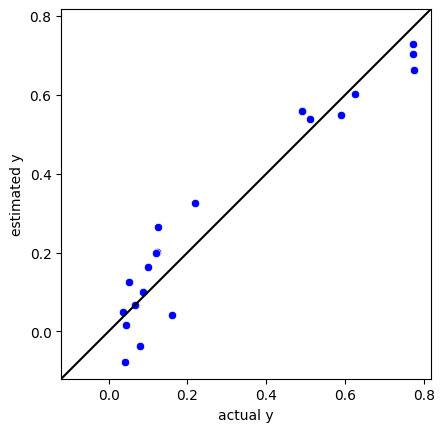

r^2 for training data : 0.9190600238137889
RMSE for training data : 0.0782074054211705
MAE for training data : 0.0664516783215491


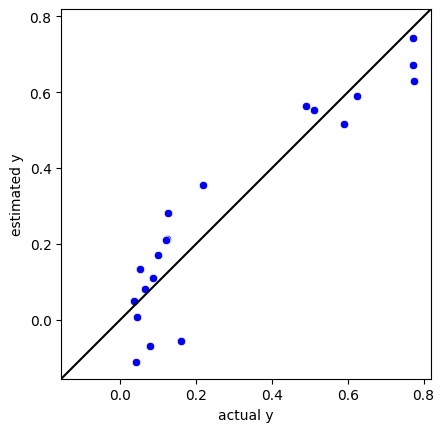

r^2 for training data : 0.8597723336403549
RMSE for training data : 0.10293977041804644
MAE for training data : 0.08647446595490224


In [ ]:
# 3.6 クロスバリデーション
import polars as pl
from func import (
    autoscaling,
    delete_zero_std_columns,
    load_data,
    rescaling,
    scatter_plot_of_result,
    show_fitting_evaluation,
)
from sklearn.linear_model import LinearRegression  # OLS モデルの構築に使用
from sklearn.model_selection import (
    KFold,
    cross_val_predict,
)

fold_number = 10  # クロスバリデーションの fold 数
dataset, index = load_data("../test_data/resin.csv", index="")

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# 標準偏差が 0 の特徴量の削除
x_wo_zero_std = delete_zero_std_columns(x)

# オートスケーリング
autoscaled_y = autoscaling(y)
autoscaled_x = autoscaling(x_wo_zero_std)

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデル構築

# 標準回帰係数
std_regr_coef = pl.DataFrame(
    {"": x_wo_zero_std.columns, "standard_regression_coefficients": model.coef_}
).write_csv(
    "../output/03_06/standard_regression_coefficients_ols.csv", quote_style="never"
)

# トレーニングデータの推定
# y の推定
autoscaled_estimated_y = pl.Series("estimated_y", model.predict(autoscaled_x))
estimated_y = rescaling(autoscaled_estimated_y, y)  # スケールをもとに戻す

# トレーニングデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_06/actual_vs_estimated_ols.png",
    y,
    estimated_y,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y, estimated_y)

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    {
        "": index,
        "actual_y": y,
        "estimated_y": estimated_y,
        "error_of_y(actual_y-estimated_y)": y - estimated_y,
    }
).write_csv("../output/03_06/estimated_y_in_detail_ols.csv", quote_style="never")

# クロスバリデーションによる y の値の推定
# クロスバリデーションの分割の設定
cv = KFold(n_splits=fold_number, random_state=9, shuffle=True)
# y の推定
autoscaled_estimated_y_in_cv = pl.Series(
    "estimated_y",
    cross_val_predict(model, autoscaled_x, autoscaled_y, cv=cv),
)
# スケールをもとに戻す
estimated_y_in_cv = rescaling(autoscaled_estimated_y_in_cv, y)

# クロスバリデーションにおける実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_06/actual_vs_estimated_in_cv_ols.png",
    y,
    estimated_y_in_cv,
    "actual y",
    "estimated y",
)

# クロスバリデーションにおけるr2, RMSE, MAE
show_fitting_evaluation(y, estimated_y_in_cv)

# クロスバリデーションの結果の保存
results_in_cv = pl.DataFrame(
    {
        "": index,
        "actual_y": y,
        "estimated_y": estimated_y_in_cv,
        "error_of_y(actual_y-estimated_y)": y - estimated_y_in_cv,
    }
).write_csv("../output/03_06/estimated_y_in_cv_in_detail_ols.csv", quote_style="never")

## 3.7 非線形重回帰分析

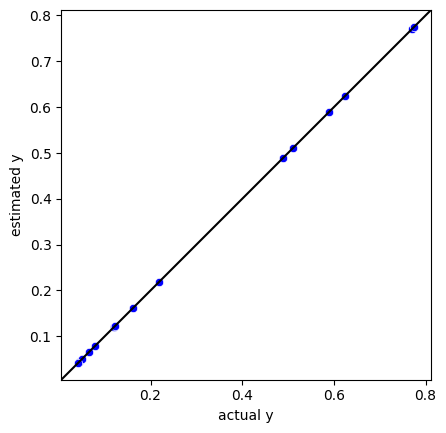

r^2 for training data : 1.0
RMSE for training data : 3.232958677154648e-16
MAE for training data : 2.7570538444858055e-16


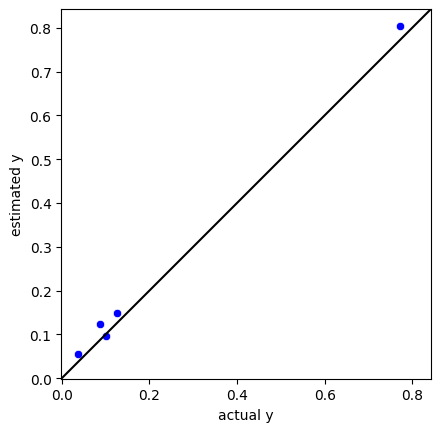

r^2 for training data : 0.9918019254956554
RMSE for training data : 0.02497139301174332
MAE for training data : 0.022206512230738034


In [ ]:
# 3.7 非線形重回帰分析
import polars as pl
from func import (
    autoscaling,
    delete_zero_std_columns,
    load_data,
    scatter_plot_of_result,
    show_fitting_evaluation,
    add_sqrt_and_interaction_terms,
)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

number_of_test_samples = 5  # テストデータのサンプル数
dataset, index = load_data("../test_data/resin.csv", index="")

# データ分割
y = dataset.get_column("property")  # 目的変数
original_x = dataset.drop(y.name)  # 説明変数

# 説明変数の二乗項や交差項を追加
x = add_sqrt_and_interaction_terms(original_x)

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()
else:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)

# 標準偏差が 0 の特徴量の削除
x_train = delete_zero_std_columns(x_train)
x_test = x_test.select(x_train.columns)

# オートスケーリング
autoscaled_y_train = autoscaling(y_train)
autoscaled_x_train = autoscaling(x_train)

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# 標準回帰係数を保存
pl.DataFrame(
    {"": x_train.columns, "standard_regression_coefficients": model.coef_}
).write_csv(
    "../output/03_07/standard_regression_coefficients_nonlinear_ols.csv",
    quote_style="never",
)

# トレーニングデータの推定
autoscaled_estimated_y_train = model.predict(autoscaled_x_train)  # y の推定
estimated_y_train = (
    autoscaled_estimated_y_train * y_train.std() + y_train.mean()
)  # スケールをもとに戻す
estimated_y_train = pl.Series("estimated_y", estimated_y_train)

# トレーニングデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_07/actual_vs_estimated_nonlinear_ols.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# トレーニングデータの結果の保存
pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": y_train - estimated_y_train,
    }
).write_csv(
    "../output/03_07/estimated_y_train_in_detail_nonlinear_ols.csv", quote_style="never"
)

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = autoscaling(x_test, x_train)

# テストデータの推定
autoscaled_estimated_y_test = model.predict(autoscaled_x_test)  # y の推定
# スケールをもとに戻す
estimated_y_test = autoscaled_estimated_y_test * y_train.std() + y_train.mean()
estimated_y_test = pl.Series("estimated_y", estimated_y_test)

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_07/actual_vs_estimated_nonlinear_ols_test.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)

# テストデータの結果の保存
results_test = pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": y_test - estimated_y_test,
    }
).write_csv(
    "../output/03_07/estimated_y_test_in_detail_nonlinear_ols.csv", quote_style="never"
)

## 3.8 決定木回帰分析

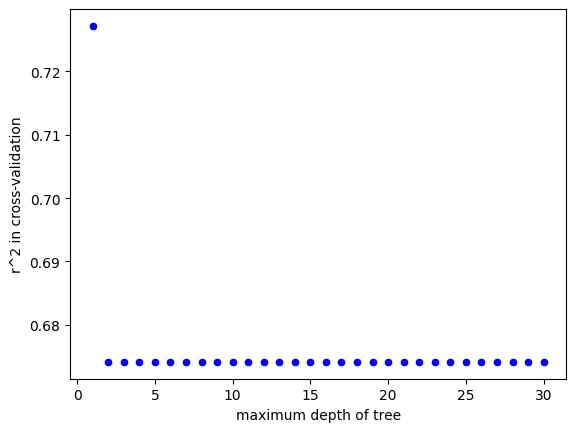

最適化された木の深さの最大値 : 1


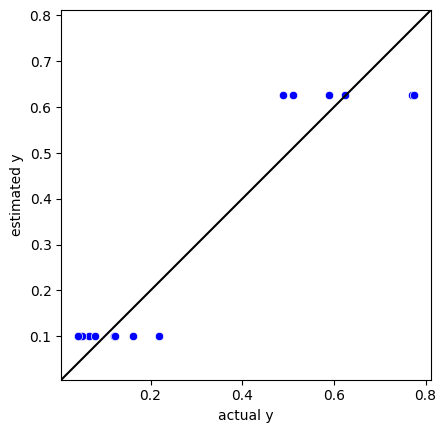

r^2 for training data : 0.9041755964364975
RMSE for training data : 0.08394177876494054
MAE for training data : 0.06844444444444445


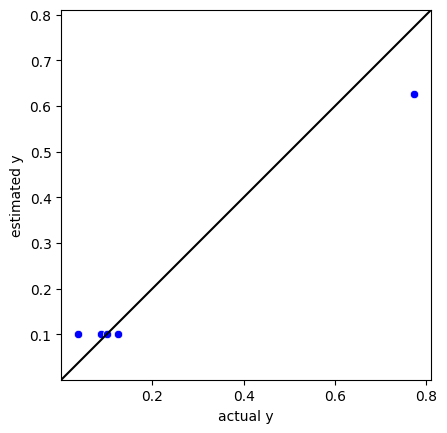

r^2 for training data : 0.9310811429864256
RMSE for training data : 0.07240288514816093
MAE for training data : 0.04960000000000002


In [ ]:
# 3.8 決定木回帰分析
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from func import (
    calc_r2,
    delete_zero_std_columns,
    load_data,
    scatter_plot_of_result,
    show_fitting_evaluation,
)
from sklearn.model_selection import (
    KFold,
    train_test_split,
)
from sklearn.tree import DecisionTreeRegressor, export_graphviz

number_of_test_samples = 5  # テストデータのサンプル数
fold_number = 10  # クロスバリデーションの fold 数
max_depths = pl.arange(1, 31, eager=True).alias("max_depth")  # 木の深さの最大値の候補
min_samples_leaf = 3  # 葉ノードごとのサンプル数の最小値

dataset, index = load_data("../test_data/resin.csv", index="")

y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()
else:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)
    index_train = pl.Series("", index_train)
    index_test = pl.Series("", index_test)

# 標準偏差が 0 の特徴量の削除
x_train = delete_zero_std_columns(x_train)
x_test = x_test.select(x_train.columns)

# クロスバリデーションによる木の深さの最適化
cv = KFold(n_splits=fold_number, random_state=9, shuffle=True)
dt_result = pl.DataFrame(
    {
        "max_depth": max_depths,
        "r2_cvs": [
            calc_r2(
                DecisionTreeRegressor,
                x_train,
                y_train,
                cv,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=59,
            )
            for max_depth in max_depths
        ],
    }
)

# 結果の確認
ax = sns.scatterplot(dt_result, x="max_depth", y="r2_cvs", color="blue")
ax.set_xlabel("maximum depth of tree")
ax.set_ylabel("r^2 in cross-validation")
plt.savefig("../output/03_08/r2cv_vs_max_depth_dt.png")
plt.show()

# クロスバリデーション後の最適化された木の深さ
optimal_max_depth = dt_result.item(dt_result["r2_cvs"].arg_max(), "max_depth")
print("最適化された木の深さの最大値 :", optimal_max_depth)

# モデル構築
model = DecisionTreeRegressor(
    max_depth=optimal_max_depth, min_samples_leaf=min_samples_leaf, random_state=59
)
model.fit(x_train, y_train)

# トレーニングデータの推定
estimated_y_train = pl.Series("estimated_y", model.predict(x_train))

# トレーニングデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_08/actual_vs_estimated_y_train.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# トレーニングデータの結果の保存
pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": y_train - estimated_y_train,
    }
).write_csv("../output/03_08/estimated_y_train_in_detail_dt.csv", quote_style="never")

# テストデータの推定
estimated_y_test = pl.Series("estimated_y", model.predict(x_test))

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_08/actual_vs_estimated_y_test_dt.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)

# テストデータの結果の保存
pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": y_test - estimated_y_test,
    }
).write_csv("../output/03_08/estimated_y_test_in_detail_dt.csv", quote_style="never")

# 決定木のモデルを確認するための dot ファイルの作成
with open("../output/03_08/tree.dot", "w") as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=[y.name])


## 3.9 ランダムフォレスト

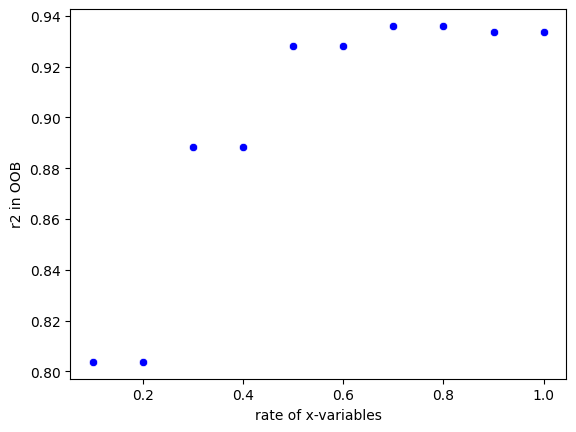

最適化された決定木ごとの X の数 : 4


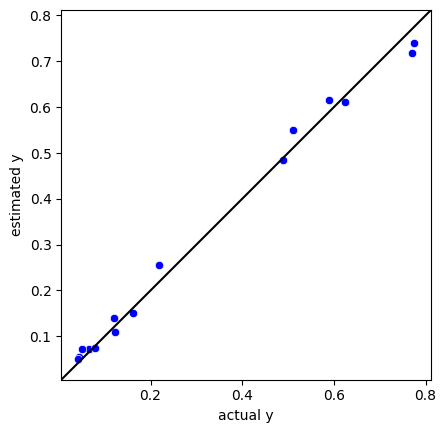

r^2 for training data : 0.991580510178215
RMSE for training data : 0.024881868677591155
MAE for training data : 0.02049177777777782


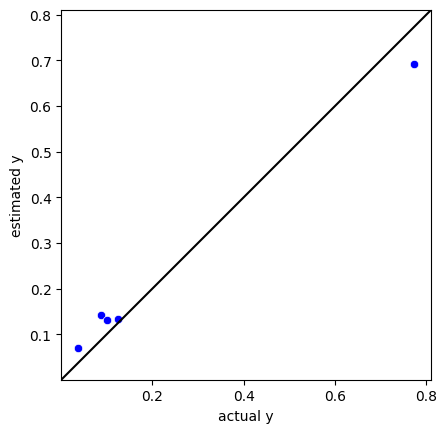

r^2 for training data : 0.9686961080352988
RMSE for training data : 0.04879620053515173
MAE for training data : 0.04205333333333384


In [ ]:
# 3.9 ランダムフォレスト

import math

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from func import (
    delete_zero_std_columns,
    load_data,
    scatter_plot_of_result,
    show_fitting_evaluation,
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

number_of_test_samples = 5  # テストデータのサンプル数
# 決定木における X の数の割合
x_variables_rates = pl.linear_space(0.1, 1.0, 10, closed="both", eager=True).alias(
    "x_variables_rate"
)
number_of_trees = 300  # サブデータセットの数

dataset, index = load_data("../test_data/resin.csv", index="")

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()
else:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)
    index_train = pl.Series("", index_train)
    index_test = pl.Series("", index_test)

# 標準偏差が 0 の特徴量の削除
x_train = delete_zero_std_columns(x_train)
x_test = x_test.select(x_train.columns)

rf_result = pl.DataFrame(
    {
        "x_variables_rate": x_variables_rates,
        "r2_oob": [
            RandomForestRegressor(
                n_estimators=number_of_trees,
                max_features=int(math.ceil(x_train.width * rate)),
                oob_score=True,
                random_state=59,
            )
            .fit(x_train, y_train)
            .oob_score_  # OOB における r2スコア。元コードのoob_prediction_とr2_score()による計算は不要
            for rate in x_variables_rates
        ],
    }
)

# 結果の確認
ax = sns.scatterplot(data=rf_result, x="x_variables_rate", y="r2_oob", color="blue")
ax.set_xlabel("rate of x-variables")
ax.set_ylabel("r2 in OOB")
plt.savefig("../output/03_09/r2oob_vs_x_variables_rate_rf.png")
plt.show()
# OOB 後の最適化された決定木ごとの X の数の割合
optimal_x_variables_rate = rf_result.item(
    rf_result["r2_oob"].arg_max(), "x_variables_rate"
)
print(
    "最適化された決定木ごとの X の数 :",
    int(math.ceil(x_train.width * optimal_x_variables_rate)),
)

# モデル構築
model = RandomForestRegressor(
    n_estimators=number_of_trees,
    max_features=int(math.ceil(x_train.width * optimal_x_variables_rate)),
    oob_score=True,
    random_state=59,
)
model.fit(x_train, y_train)

# 特徴量の重要度
pl.DataFrame(
    {
        "": x_train.columns,
        "importance": model.feature_importances_,
    }
).write_csv("../output/03_09/variable_importance_rf.csv", quote_style="never")

# トレーニングデータの推定
estimated_y_train = pl.Series("estimated_y", model.predict(x_train))

# トレーニングデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_09/actual_vs_estimated_y_train_rf.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# トレーニングデータの結果の保存
pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": y_train - estimated_y_train,
    }
).write_csv("../output/03_09/estimated_y_train_in_detail_rf.csv", quote_style="never")
# テストデータの推定
estimated_y_test = pl.Series("estimated_y", model.predict(x_test))

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_09/actual_vs_estimated_y_test_rf.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)

# テストデータの結果の保存
pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": y_test - estimated_y_test,
    }
).write_csv("../output/03_09/estimated_y_test_in_detail_rf.csv", quote_style="never")

## 3.10 サポートベクター回帰(ガウシアンカーネル)

最適化された C : 2.0 (log(C)=1.0)
最適化された ε : 0.0009765625 (log(ε)=-10.0)
最適化された γ : 0.125 (log(γ)=-3.0)


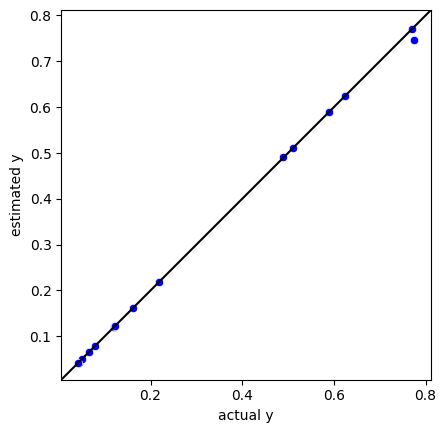

r^2 for training data : 0.9992786834253825
RMSE for training data : 0.007282878443245324
MAE for training data : 0.0021640505597515145


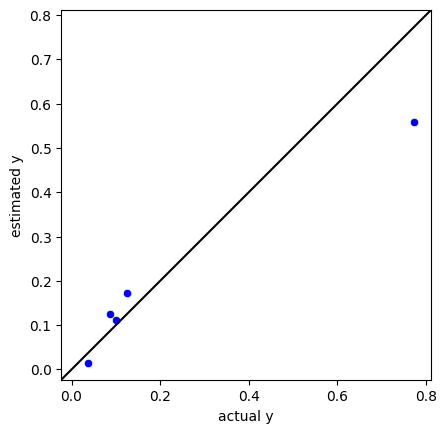

r^2 for training data : 0.8680484824452412
RMSE for training data : 0.10018300034351296
MAE for training data : 0.06714949414490605


In [ ]:
# 3.10 サポートベクター回帰(ガウシアンカーネル)
import warnings

import polars as pl
from func import (
    autoscaling,
    delete_zero_std_columns,
    load_data,
    optimize_hyperparameters_by_cv,
    rescaling,
    scatter_plot_of_result,
    show_fitting_evaluation,
)
from sklearn.model_selection import KFold, train_test_split
from sklearn.svm import SVR  # SVR モデルの構築に使用

warnings.filterwarnings("ignore")

number_of_test_samples = 5  # テストデータのサンプル数
fold_number = 10  # クロスバリデーションの fold 数

exp_base = pl.Series()

# SVR の C の候補
nonlinear_svr_cs = 2.0 ** pl.arange(-5, 11, eager=True).alias("c")
# SVR の ε の候補
nonlinear_svr_epsilons = 2.0 ** pl.arange(-10, 1, eager=True).alias("epsilon")
# SVR のガウシアンカーネルの γ の候補
nonlinear_svr_gammas = 2.0 ** pl.arange(-20, 11, eager=True).alias("gamma")

dataset, index = load_data("../test_data/resin.csv", index="")
# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()
else:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)
    index_train = pl.Series("", index_train)
    index_test = pl.Series("", index_test)

# 標準偏差が 0 の特徴量の削除
x_train = delete_zero_std_columns(x_train)
x_test = x_test.select(x_train.columns)

# オートスケーリング
autoscaled_y_train = autoscaling(y_train)
autoscaled_x_train = autoscaling(x_train)

# ハイパーパラメータC, ε, γの最適化
# クロスバリデーションの分割の設定
cv = KFold(n_splits=fold_number, random_state=9, shuffle=True)
optimal_nonlinear_c, optimal_nonlinear_epsilon, optimal_nonlinear_gamma = (
    optimize_hyperparameters_by_cv(
        SVR,
        autoscaled_x_train,
        autoscaled_y_train,
        y_train,
        nonlinear_svr_cs,
        nonlinear_svr_epsilons,
        nonlinear_svr_gammas,
        cv,
    )
)

# モデル構築
model = SVR(  # SVR モデルの宣言
    kernel="rbf",
    C=optimal_nonlinear_c,
    epsilon=optimal_nonlinear_epsilon,
    gamma=optimal_nonlinear_gamma,
)
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# トレーニングデータの推定
autoscaled_estimated_y_train = pl.Series(
    "estimated_y", model.predict(autoscaled_x_train)
)  # y の推定
# スケールをもとに戻す
estimated_y_train = autoscaled_estimated_y_train * y_train.std() + y_train.mean()
x_train.columns

# トレーニングデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_10/actual_vs_estimated_y_train_svr_gaussian.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": (y_train - estimated_y_train),
    }
).write_csv(
    "../output/03_10/estimated_y_train_in_detail_svr_gaussian.csv", quote_style="never"
)

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = autoscaling(x_test, x_train)
# テストデータの推定
autoscaled_estimated_y_test = pl.Series("estimated_y", model.predict(autoscaled_x_test))
# スケールをもとに戻す
estimated_y_test = rescaling(autoscaled_estimated_y_test, y_train)

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_10/actual_vs_estimated_y_test_svr_gaussian.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)

# テストデータの結果の保存
results_test = pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": (y_test - estimated_y_test),
    },
).write_csv(
    "../output/03_10/estimated_y_test_in_detail_svr_gaussian.csv", quote_style="never"
)


## 3.10 サポートベクター回帰(リニア)

Best parameter log(C): -4.0
Best parameter log(epsilon): -3.0


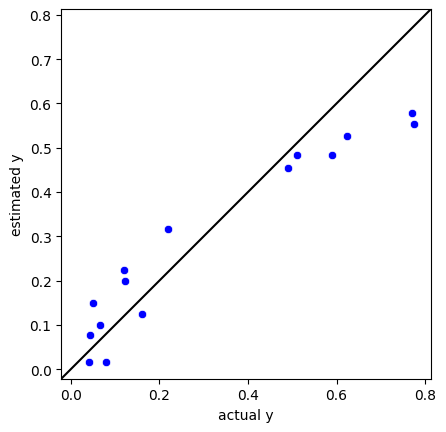

r^2 for training data : 0.8611071828588115
RMSE for training data : 0.10106016404118717
MAE for training data : 0.08339400520184116


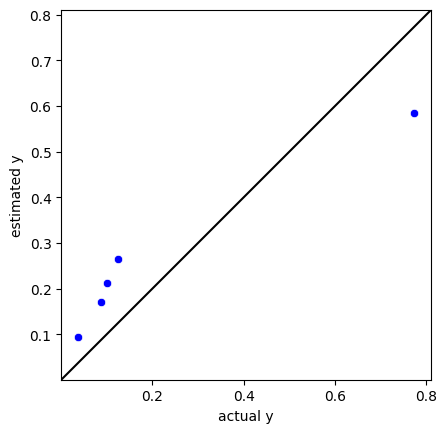

r^2 for training data : 0.7968905795557959
RMSE for training data : 0.12429448890286453
MAE for training data : 0.11557539620640603


In [ ]:
# 3.10 サポートベクター回帰(リニア)
import warnings

import polars as pl
from func import (
    autoscaling,
    delete_zero_std_columns,
    load_data,
    optimize_hyperparameters_by_gs,
    rescaling,
    scatter_plot_of_result,
    show_fitting_evaluation,
)
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.svm import SVR

warnings.filterwarnings("ignore")

number_of_test_samples = 5  # テストデータのサンプル数
fold_number = 5  # クロスバリデーションの fold 数
linear_svr_cs = 2.0 ** pl.arange(-10, 5, eager=True)
linear_svr_epsilons = 2.0 ** pl.arange(-10, 0, eager=True)

dataset, index = load_data("../test_data/resin.csv", index="")

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()
else:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)
    index_train = pl.Series("", index_train)
    index_test = pl.Series("", index_test)

# 標準偏差が 0 の特徴量の削除
x_train = delete_zero_std_columns(x_train)
x_test = x_test.select(x_train.columns)

# オートスケーリング
autoscaled_y_train = autoscaling(y_train)
autoscaled_x_train = autoscaling(x_train)

# クロスバリデーションによる C, ε の最適化
cv = KFold(n_splits=fold_number, random_state=9, shuffle=True)
kernel = "linear"
best_params = optimize_hyperparameters_by_gs(
    SVR,
    autoscaled_x_train,
    autoscaled_y_train,
    {"C": linear_svr_cs.to_numpy(), "epsilon": linear_svr_epsilons.to_numpy()},
    cv,
    kernel=kernel,
)
optimal_linear_svr_c = best_params["C"]
optimal_linear_svr_epsilon = best_params["epsilon"]

# モデル構築
model = SVR(kernel=kernel, C=optimal_linear_svr_c, epsilon=optimal_linear_svr_epsilon)
model.fit(autoscaled_x_train, autoscaled_y_train)

# 標準回帰係数
standard_regression_coefficients = pl.DataFrame(
    {
        "": x_train.columns,
        "standard_regression_coefficients": model.coef_.flatten(),
    }
).write_csv(
    "../output/03_10/standard_regression_coefficients_svr_linear.csv",
    quote_style="never",
)

# トレーニングデータの推定
autoscaled_estimated_y_train = pl.Series(
    "estimated_y", model.predict(autoscaled_x_train)
)
estimated_y_train = rescaling(autoscaled_estimated_y_train, y_train)

# トレーニングデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_10/actual_vs_estimated_y_train_svr_linear.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": (y_train - estimated_y_train),
    }
).write_csv(
    "../output/03_10/estimated_y_train_in_detail_svr_linear.csv", quote_style="never"
)

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = autoscaling(x_test, x_train)

# テストデータの推定
autoscaled_estimated_y_test = pl.Series("estimated_y", model.predict(autoscaled_x_test))
estimated_y_test = rescaling(autoscaled_estimated_y_test, y_train)

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_10/actual_vs_estimated_y_test_svr_linear.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)

# テストデータの結果の保存
results_test = pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": (y_test - estimated_y_test),
    }
).write_csv(
    "../output/03_10/estimated_y_test_in_detail_svr_linear.csv", quote_style="never"
)

## 3.11 GPR_one_kernel

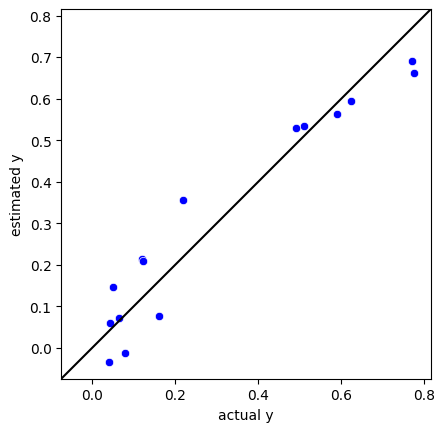

r^2 for training data : 0.9197619416738076
RMSE for training data : 0.07681221888753173
MAE for training data : 0.06647837881373914


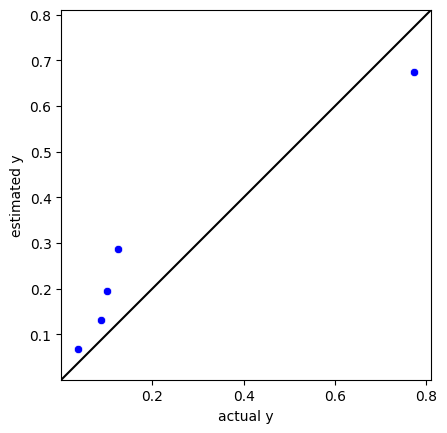

r^2 for training data : 0.8748839370673773
RMSE for training data : 0.09755361653719763
MAE for training data : 0.08576594215431114


In [ ]:
# 3.11 GPR_one_kernel
import warnings

import polars as pl
from func import (
    autoscaling,
    delete_zero_std_columns,
    generate_kernels,
    load_data,
    rescaling,
    scatter_plot_of_result,
    show_fitting_evaluation,
)
from sklearn.gaussian_process import GaussianProcessRegressor  # GPR モデル構築に使用
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")


number_of_test_samples = 5  # テストデータのサンプル数

dataset, index = load_data("../test_data/resin.csv", index="")

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()
else:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)
    index_train = pl.Series("", index_train)
    index_test = pl.Series("", index_test)

# 標準偏差が 0 の特徴量の削除
x_train = delete_zero_std_columns(x_train)
x_test = x_test.select(x_train.columns)

# カーネル 11 種類
kernel_number = 2  # 1, 2, 3, ..., 11
kernels = generate_kernels(x_train)
selected_kernel = kernels[kernel_number]

# オートスケーリング
autoscaled_y_train = autoscaling(y_train)
autoscaled_x_train = autoscaling(x_train)

# モデル構築
model = GaussianProcessRegressor(alpha=0, kernel=selected_kernel)  # GPR モデルの宣言
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# トレーニングデータの推定
# y の推定
autoscaled_estimated_y_train, autoscaled_estimated_y_train_std = model.predict(
    autoscaled_x_train, return_std=True
)
# スケールを戻す
estimated_y_train = rescaling(
    pl.Series("estimated_y", autoscaled_estimated_y_train), y_train
)
estimated_y_train_std = rescaling(
    pl.Series("std_of_estimated_y", autoscaled_estimated_y_train_std),
    y_train,
    is_std=True,
)

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": (y_train - estimated_y_train),
        "std_of_estimated_y": estimated_y_train_std,
    }
).write_csv(
    "../output/03_11/estimated_y_train_in_detail_gpr_one_kernel.csv",
    quote_style="never",
)

# トレーニングデータの実測値 vs. 推定値のプロット
# 実測値 vs. 推定値プロット
scatter_plot_of_result(
    "../output/03_11/scatter_plot_train_gpr_one_kernel.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = autoscaling(x_test, x_train)

# テストデータの推定
# y の推定
autoscaled_estimated_y_test, autoscaled_estimated_y_test_std = model.predict(
    autoscaled_x_test, return_std=True
)
# スケールを戻す
estimated_y_test = rescaling(
    pl.Series("estimated_y", autoscaled_estimated_y_test), y_train
)
estimated_y_test_std = rescaling(
    pl.Series("std_of_estimated_y", autoscaled_estimated_y_test_std),
    y_train,
    is_std=True,
)
# テストデータの結果の保存
results_test = pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": (y_test - estimated_y_test),
        "std_of_estimated_y": estimated_y_test_std,
    }
).write_csv(
    "../output/03_11/estimated_y_test_in_detail_gpr_one_kernel.csv", quote_style="never"
)

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_11/scatter_plot_test_gpr_one_kernel.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)

## 3.11 GPR kernels

クロスバリデーションで選択されたカーネル関数 : 1**2 * RBF(length_scale=[1, 1, 1, 1, 1]) + WhiteKernel(noise_level=1) + 1**2 * DotProduct(sigma_0=1)


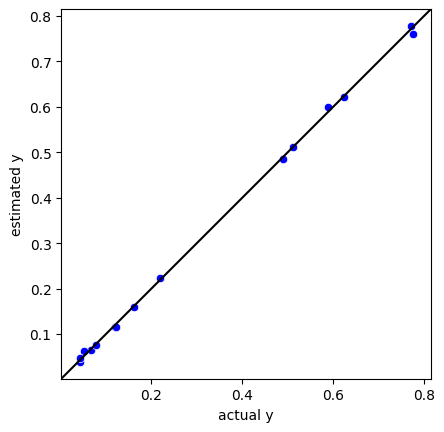

r^2 for training data : 0.9993827681493411
RMSE for training data : 0.006736964669458696
MAE for training data : 0.00551314598517551


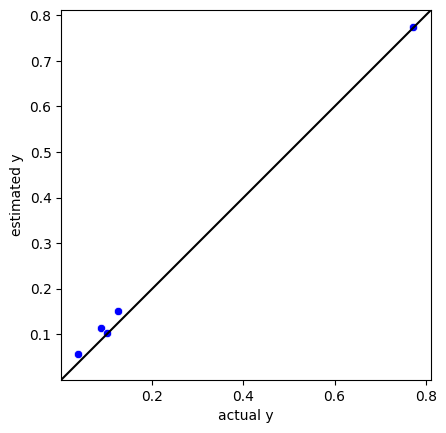

r^2 for training data : 0.9956247784019839
RMSE for training data : 0.01824260549972953
MAE for training data : 0.014923443741047666


In [ ]:
# 3.11 GPR kernels
import warnings

import polars as pl
from func import (
    autoscaling,
    delete_zero_std_columns,
    generate_kernels,
    load_data,
    rescaling,
    scatter_plot_of_result,
    show_fitting_evaluation,
    calc_r2,
)
from sklearn.gaussian_process import GaussianProcessRegressor  # GPR モデル構築に使用
from sklearn.model_selection import KFold, train_test_split

warnings.filterwarnings("ignore")

number_of_test_samples = 5  # テストデータのサンプル数
fold_number = 10  # クロスバリデーションの fold 数

dataset, index = load_data("../test_data/resin.csv", index="")

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
    index_train = index.clone()
    index_test = index.clone()
else:
    x_train, x_test, y_train, y_test, index_train, index_test = train_test_split(
        x, y, index, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)
    index_train = pl.Series("", index_train)
    index_test = pl.Series("", index_test)

# 標準偏差が 0 の特徴量の削除
x_train = delete_zero_std_columns(x_train)
x_test = x_test.select(x_train.columns)

# カーネル 11 種類
kernels = generate_kernels(x_train)

# オートスケーリング
autoscaled_y_train = autoscaling(y_train)
autoscaled_x_train = autoscaling(x_train)

# クロスバリデーションによるカーネル関数の最適化
# クロスバリデーションの分割の設定
cv = KFold(n_splits=fold_number, random_state=9, shuffle=True)
r2_cvs = pl.Series(
    "r2_cvs",
    [
        calc_r2(
            GaussianProcessRegressor,
            autoscaled_x_train,
            autoscaled_y_train,
            cv,
            y_train,
            kernel=kernel,
        )
        for kernel in kernels
    ],
)
optimal_kernel = kernels[r2_cvs.arg_max()]  # r2が最も大きい(最適な)カーネル関数
print("クロスバリデーションで選択されたカーネル関数 :", optimal_kernel)

# モデル構築
model = GaussianProcessRegressor(alpha=0, kernel=optimal_kernel)  # GPR モデルの宣言
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# トレーニングデータの推定
# y の推定
autoscaled_estimated_y_train, autoscaled_estimated_y_train_std = model.predict(
    autoscaled_x_train, return_std=True
)
# スケールを戻す
estimated_y_train = rescaling(
    pl.Series("estimated_y", autoscaled_estimated_y_train), y_train
)
estimated_y_train_std = rescaling(
    pl.Series("std_of_estimated_y", autoscaled_estimated_y_train_std),
    y_train,
    is_std=True,
)

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    {
        "": index_train,
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": (y_train - estimated_y_train),
        "std_of_estimated_y": estimated_y_train_std,
    }
).write_csv(
    "../output/03_11/estimated_y_train_in_detail_gpr_kernels.csv", quote_style="never"
)

# トレーニングデータの実測値 vs. 推定値のプロット
# 実測値 vs. 推定値プロット
scatter_plot_of_result(
    "../output/03_11/scatter_plot_train_gpr_kernels.png",
    y_train,
    estimated_y_train,
    "actual y",
    "estimated y",
)

# トレーニングデータのr2, RMSE, MAE
show_fitting_evaluation(y_train, estimated_y_train)

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = autoscaling(x_test, x_train)

# テストデータの推定
# y の推定
autoscaled_estimated_y_test, autoscaled_estimated_y_test_std = model.predict(
    autoscaled_x_test, return_std=True
)
# スケールを戻す
estimated_y_test = rescaling(
    pl.Series("estimated_y", autoscaled_estimated_y_test), y_train
)
estimated_y_test_std = rescaling(
    pl.Series("std_of_estimated_y", autoscaled_estimated_y_test_std),
    y_train,
    is_std=True,
)
# テストデータの結果の保存
results_test = pl.DataFrame(
    {
        "": index_test,
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": (y_test - estimated_y_test),
        "std_of_estimated_y": estimated_y_test_std,
    }
).write_csv(
    "../output/03_11/estimated_y_test_in_detail_gpr_kernels.csv", quote_style="never"
)

# テストデータの実測値 vs. 推定値のプロット
scatter_plot_of_result(
    "../output/03_11/scatter_plot_test_gpr_kernels.png",
    y_test,
    estimated_y_test,
    "actual y",
    "estimated y",
)

# テストデータのr2, RMSE, MAE
show_fitting_evaluation(y_test, estimated_y_test)